<a href="https://colab.research.google.com/github/karibeam/tecprog1_Karine_Almeida/blob/main/AnaliseExploratoriaCombustivelBrasil.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analise exploratória de Combustível no Brasil

---

Autores: 
  - Carlos Magno Dias
  - Karine Almeida
  - Luana Jaime Tocchio
  - Moroni Bora
  - Vitor Rodrigues

e-mails: 
  - carlosmagdias@gmail.com
  - almeida.karinealves@gmail.com
  - luanatocchio@gmail.com
  - moronibora@gmail.com
  - vitorfbaiano@gmail.com 

---

## 1.Introdução

AAAAA

## 2.Objetivos

### 2.1. Objetivo Geral:
  Acompanhar a evolução de preços médios de (produto 1) e (produto 2) ao longo da série temporal de 2004 a 2021.

### 2.2. Objetivos Específicos:
Como é a evolução de preços desses produtos em escala nacional?

Como é a evolução de preços desses produtos em escala regional?

Como é a evolução de preços desses produtos em escala estadual (uma região)?

A partir dessas análises, o que muda? Qual região/estado tem maior variação de preços médios? Preço médio min e max?

Nas variações apresentadas, quais as possíveis sugestões para um aumento/diminuição?

## 3.Preparação e Limpeza de Dados

### 3.1. Leitura dos Dados

Primeiro foi realizada a leitura do dataset, que está alocado em um repositório pessoal do GitHub; e importadas as bibliotecas necessárias.

In [ ]:
url_gas_tsv = 'https://raw.githubusercontent.com/MoroniMenesses/tec_prog1_Moroni_Bora/main/2004-2021.tsv'

A princípio as bibliotecas utilizadas foram: NumPy e Pandas.


In [ ]:
import pandas as pd
import numpy as np

A leitura do *dataset* se deu através do comando **pd.read_csv**, utilizando a variável com o link do *dataset* como parâmetro e tendo como separador a tabulação, uma vez que se trata de um arquivo do tipo **.tsv**.

Abaixo está presente as primeiras cinco linhas do *dataset*, no qual é possível visualizar a estrutura e disposição dos dados de forma crua (sem tratamento).

In [ ]:
dataset_gas=pd.read_csv(url_gas_tsv,sep='\t')
dataset_gas.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,1.350,0.463,0.012,0.825,0.11,0.4201,0.9666,0.133
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05,0.115
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,1.760,0.419,0.070,0.97,0.095,0.5614,1.161,0.098
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,1.509,0.432,0.055,0.83,0.119,0.5991,1.22242,0.143
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,1.400,0.24,0.066,0.941,0.077,0.7441,1.0317,0.082


Foi feita a conversão do *dataset* em formato **.tsv** para o formato **.csv**.

*<sub>*Apenas para exemplificar uma maneira de converter o formato de um *dataset* para outro.*

In [ ]:
dataset_gas.to_csv(r'/content/gas.csv')

### 3.2. Investigação e Limpeza do *Dataset*

Foram obtidas informações preliminares a respeito dos dados presentes no *dataset* através do método **.info()**.

In [ ]:
dataset_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Foi observado o tipo *Object* para diversas colunas, inclusive colunas cujos dados são numéricos. Isto nos indicou a necessidade de conversão de algumas dessas colunas para outros tipos.

Além do método acima, aplicamos o (atributo) **.shape** para indentificar o formato do *dataset*.

In [ ]:
dataset_gas.shape

(120823, 18)

O *dataset* possui 120823 linhas e 18 colunas.

Outro método utilizado foi o **.describe()** que nos retorna dados estatísticos sobre o *dataset*, como média, desvio-padrão, quartis, entre outros.

In [ ]:
dataset_gas.describe()

,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,COEF DE VARIAÇÃO REVENDA
count,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000,120823.000000
mean,221.066461,11.473440,0.684132,9.977821,13.233902,0.045298
std,387.940239,19.161823,1.403317,16.433783,22.451445,0.024763
min,1.000000,0.766000,0.000000,0.590000,0.999000,0.000000
25%,39.000000,2.157000,0.075000,1.989000,2.420000,0.029000
50%,99.000000,2.899000,0.121000,2.690000,3.200000,0.041000
75%,226.000000,4.026000,0.204000,3.790000,4.589000,0.058000
max,4167.000000,107.500000,10.748000,100.000000,120.000000,0.395000


O método **.describe()** nos retorna apenas as colunas que possuem dados dos tipos **int/float**. Considerando que o dataset possui 18 colunas, sendo a maioria com dados numéricos, esperava-se que mais colunas aparecessem no resultado do **.describe()**. No entanto, apenas seis colunas foram apresentadas, o que nos levou a questionar a possibilidade de divergência dos tipos de dados presentes na mesma coluna, ou mesmo dados faltantes.

Dessa forma, utilizamos o método **.isna()** aliado ao **.sum()** para identificar as colunas onde poderiam haver números 'NaN' e quantificar esses elementos.

In [ ]:
dataset_gas.isna().sum()

DATA INICIAL                     0
DATA FINAL                       0
REGIÃO                           0
ESTADO                           0
PRODUTO                          0
NÚMERO DE POSTOS PESQUISADOS     0
UNIDADE DE MEDIDA                0
PREÇO MÉDIO REVENDA              0
DESVIO PADRÃO REVENDA            0
PREÇO MÍNIMO REVENDA             0
PREÇO MÁXIMO REVENDA             0
MARGEM MÉDIA REVENDA             0
COEF DE VARIAÇÃO REVENDA         0
PREÇO MÉDIO DISTRIBUIÇÃO         0
DESVIO PADRÃO DISTRIBUIÇÃO       0
PREÇO MÍNIMO DISTRIBUIÇÃO        0
PREÇO MÁXIMO DISTRIBUIÇÃO        0
COEF DE VARIAÇÃO DISTRIBUIÇÃO    0
dtype: int64

O resultado da análise mostrou que não há colunas com valores 'NaN' - *Not a Number*. Porém isso não condiz com o observado: por que algumas colunas, que possuem valores númericos, estão sendo classificadas como **'Object'**?

Na descrição do *dataset* no Kaggle, existe a seguinte informação:

    *NULL values are now replaces with '-99999.0'*

Portanto, verificamos se há ocorrências deste valor ao longo do *dataset* utilizando o método **.isin()**. Vale ressaltar que encontramos a *string* '-' também sendo utilizada para substituir valores 'NaN' e também foi vericada a ocorrência desta *string*.

In [ ]:
buscando_nulos = dataset_gas.isin(['-', '-99999.0'])
resultado = dataset_gas[buscando_nulos]
resultado.tail()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
120818,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120819,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120820,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120821,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0
120822,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-99999.0,NaN,-99999.0,-99999.0,-99999.0,-99999.0,-99999.0


Ao criar um *dataframe* no qual somente os valores indesejados ('-' e '-99999.0'), NÃO nulos, estão presentes, é possível quantificá-los através da combinação dos métodos **.notna()** e **.sum()**.

In [ ]:
resultado.notna().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             8948
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         8908
DESVIO PADRÃO DISTRIBUIÇÃO       8908
PREÇO MÍNIMO DISTRIBUIÇÃO        8908
PREÇO MÁXIMO DISTRIBUIÇÃO        8908
COEF DE VARIAÇÃO DISTRIBUIÇÃO    8908
dtype: int64

Identificamos aproximadamente 9.000 linhas que possuem valores não-definidos.Dessa forma, quanto isto representa em nosso volume total de linhas?

In [ ]:
8948 / dataset_gas.shape[0] *100

7.405874709285484

Foi observado que estes valores 'NaN' se encontram em aproximadamente 7,4% das linhas do *dataset*. Assim, foi optado por remover estas linhas já que apresentam dados incompletos e não são uma quantidade expressiva em relação ao todo.

### Com relação aos dados -99999.00, segundo o site do governo que levantou os mesmos disponibilizado [aqui](https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/precos-revenda-e-de-distribuicao-combustiveis), na seção de observações, item 3. Não foi possível levantar dados de distribuição durante o período pandêmico.

### Seguimos removendo estes dados para analises futuras, visto que caso seja necessário aplicar um algoritmo de machine learning, estes dados serão ou removidos ou será aplicado um "valor falso", seja média ou valor da série temporal anterior.

será que é necessário retirar estas linhas? olhar na análise exploratória
*olhar se o valor medio de revenda está considerando os impostos

Os valores '-' e '-99999.0' foram substituídos por 'NaN' utilizando o método **.replace()**.

In [ ]:
dataset_gas = dataset_gas.replace('-' , np.nan)
dataset_gas = dataset_gas.replace('-99999.0' , np.nan)

In [ ]:
dataset_gas.isna().sum()

DATA INICIAL                        0
DATA FINAL                          0
REGIÃO                              0
ESTADO                              0
PRODUTO                             0
NÚMERO DE POSTOS PESQUISADOS        0
UNIDADE DE MEDIDA                   0
PREÇO MÉDIO REVENDA                 0
DESVIO PADRÃO REVENDA               0
PREÇO MÍNIMO REVENDA                0
PREÇO MÁXIMO REVENDA                0
MARGEM MÉDIA REVENDA             8948
COEF DE VARIAÇÃO REVENDA            0
PREÇO MÉDIO DISTRIBUIÇÃO         8908
DESVIO PADRÃO DISTRIBUIÇÃO       8908
PREÇO MÍNIMO DISTRIBUIÇÃO        8908
PREÇO MÁXIMO DISTRIBUIÇÃO        8908
COEF DE VARIAÇÃO DISTRIBUIÇÃO    8908
dtype: int64

Assim, os valores indesejados foram substituídos por 'NaN'. 

Para a remoção desses valores, foi criado um novo *dataframe* para futuras análises e o *dataframe* original será mantido caso seja necessário recuperar os dados.

In [ ]:
dataset_gas_limpo = dataset_gas.copy()
dataset_gas_limpo.shape

(120823, 18)

Com o novo *dataframe*, é possível remover as linhas que possuem 'NaN' utilizando o método **.dropna()**. Ao atribuir o **.shape** ao novo *dataframe* é possível observar a redução do número de linhas correspondente aos 7,4% calculados anteriormente.

In [ ]:
dataset_gas_limpo = dataset_gas_limpo.dropna()
dataset_gas_limpo.shape

(111875, 18)

Foi aplicado o método **.info()** a fim de conferir se os tipos de dados das colunas novamente.

In [ ]:
dataset_gas_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111875 entries, 0 to 115883
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   111875 non-null  object 
 1   DATA FINAL                     111875 non-null  object 
 2   REGIÃO                         111875 non-null  object 
 3   ESTADO                         111875 non-null  object 
 4   PRODUTO                        111875 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   111875 non-null  int64  
 6   UNIDADE DE MEDIDA              111875 non-null  object 
 7   PREÇO MÉDIO REVENDA            111875 non-null  float64
 8   DESVIO PADRÃO REVENDA          111875 non-null  float64
 9   PREÇO MÍNIMO REVENDA           111875 non-null  float64
 10  PREÇO MÁXIMO REVENDA           111875 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

Vimos que as colunas:

        -'MARGEM MÉDIA REVENDA',
        -'PREÇO MÉDIO DISTRIBUIÇÃO',
        -'DESVIO PADRÃO DISTRIBUIÇÃO', 
        -'PREÇO MÍNIMO DISTRIBUIÇÃO',
        -'PREÇO MÁXIMO DISTRIBUIÇÃO', 
        -'COEF DE VARIAÇÃO DISTRIBUIÇÃO',

Ainda estavam com o tipo *'Object'*. Desta forma, uma mudança para o tipo *'Float'* será feita:

In [ ]:
cols = ['MARGEM MÉDIA REVENDA',
        'PREÇO MÉDIO DISTRIBUIÇÃO',
        'DESVIO PADRÃO DISTRIBUIÇÃO', 
        'PREÇO MÍNIMO DISTRIBUIÇÃO',
        'PREÇO MÁXIMO DISTRIBUIÇÃO', 
        'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
]
for coluna in cols:
  dataset_gas_limpo[coluna]=dataset_gas_limpo[coluna].astype(float)

Aplicando o **.info()** novamente, viu-se que:

In [ ]:
dataset_gas_limpo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111875 entries, 0 to 115883
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   111875 non-null  object 
 1   DATA FINAL                     111875 non-null  object 
 2   REGIÃO                         111875 non-null  object 
 3   ESTADO                         111875 non-null  object 
 4   PRODUTO                        111875 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   111875 non-null  int64  
 6   UNIDADE DE MEDIDA              111875 non-null  object 
 7   PREÇO MÉDIO REVENDA            111875 non-null  float64
 8   DESVIO PADRÃO REVENDA          111875 non-null  float64
 9   PREÇO MÍNIMO REVENDA           111875 non-null  float64
 10  PREÇO MÁXIMO REVENDA           111875 non-null  float64
 11  MARGEM MÉDIA REVENDA           111875 non-null  float64
 12  COEF DE VARIAÇÃO REVENDA      

Feito isso, adequamos os tipos de dados *'Object'* das colunas selecionadas para *'Float'*.

Verificamos a ocorrência de duplicatas nas linhas do *dataframe*, pois não há sentido em haver dados duplicados, visto que se trata de um *dataset* contendo uma série temporal.



In [ ]:
dataset_gas_limpo.duplicated().sum()

0

A série temporal apresentada no *dataset* é semanal. Desta forma, criamos um "Calendário", no qual foi extraída a informação de dia, mês e ano e explicitada em colunas para cada um dos dados.

_______

Definindo as funções necessárias:

*Split_data*: pega o valor da coluna de datas e separa em uma lista [ano, mes dia]

*extrair_lista*: cria listas com ano, mes e dia separadamente para uso futuro 

In [ ]:
def split_data(coluna,caracter_separador):
  lista_split=coluna.str.split(caracter_separador)
  return(lista_split)

def extrair_lista(lista,indice):
  lista_construida=[]
  for i in range(0,len(lista)):
    lista_construida.append(int(lista[i][indice]))
  return lista_construida

Aplicando as funções acima e em variáveis de armazenamento

In [ ]:
separados_dias_anos_inicial=split_data(dataset_gas_limpo['DATA INICIAL'],'-')

separados_dias_anos_final=split_data(dataset_gas_limpo['DATA FINAL'],'-')

separados_dias_anos_final

0         [2004, 05, 15]
1         [2004, 05, 15]
2         [2004, 05, 15]
3         [2004, 05, 15]
4         [2004, 05, 15]
               ...      
115879    [2020, 08, 22]
115880    [2020, 08, 22]
115881    [2020, 08, 22]
115882    [2020, 08, 22]
115883    [2020, 08, 22]
Name: DATA FINAL, Length: 111875, dtype: object

In [ ]:
# anos_inicial=extrair_lista(separados_dias_anos_inicial,0)
# meses_inicial=extrair_lista(separados_dias_anos_inicial,1)
# dias_inicial=extrair_lista(separados_dias_anos_inicial,2)
# anos_final=extrair_lista(separados_dias_anos_final,0)
# meses_final=extrair_lista(separados_dias_anos_final,1)
# dias_final=extrair_lista(separados_dias_anos_final,2)


Colocar as listas no dataframe




In [ ]:
# dataset_gas_limpo['DIA INICIAL']=dias_inicial
# dataset_gas_limpo['MES INICIAL']=meses_inicial
# dataset_gas_limpo['ANO INICIAL']=anos_inicial
# dataset_gas_limpo['DIA FINAL']=dias_final
# dataset_gas_limpo['MES FINAL']=meses_final
# dataset_gas_limpo['ANO FINAL']=anos_final

_________

Isto foi feito utilizando a função **.to_datetime** do próprio Pandas:

In [ ]:
dataset_gas_limpo['DIA INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce').dt.day
dataset_gas_limpo['MES INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce').dt.month
dataset_gas_limpo['ANO INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce', ).dt.year
dataset_gas_limpo['SEMANA INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce').dt.week

dataset_gas_limpo['DIA FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.day
dataset_gas_limpo['MES FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.month
dataset_gas_limpo['ANO FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.year
dataset_gas_limpo['SEMANA FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.week

<ipython-input-24-a1c81358fe2e>:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset_gas_limpo['SEMANA INICIAL']=pd.to_datetime(dataset_gas_limpo['DATA INICIAL'], errors ='coerce').dt.week
<ipython-input-24-a1c81358fe2e>:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  dataset_gas_limpo['SEMANA FINAL']=pd.to_datetime(dataset_gas_limpo['DATA FINAL'], errors ='coerce').dt.week


Após aplicarmos a função no *dataframe*, as novas colunas criadas foram inseridas.

In [ ]:
dataset_gas_limpo.head()

,DATA INICIAL,DATA FINAL,REGIÃO,ESTADO,PRODUTO,NÚMERO DE POSTOS PESQUISADOS,UNIDADE DE MEDIDA,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,...,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL
0,2004-05-09,2004-05-15,CENTRO OESTE,DISTRITO FEDERAL,ETANOL HIDRATADO,127,R$/l,1.288,0.016,1.19,...,0.96660,0.133,9,5,2004,19,15,5,2004,20
1,2004-05-09,2004-05-15,CENTRO OESTE,GOIAS,ETANOL HIDRATADO,387,R$/l,1.162,0.114,0.89,...,1.05000,0.115,9,5,2004,19,15,5,2004,20
2,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO,ETANOL HIDRATADO,192,R$/l,1.389,0.097,1.18,...,1.16100,0.098,9,5,2004,19,15,5,2004,20
3,2004-05-09,2004-05-15,CENTRO OESTE,MATO GROSSO DO SUL,ETANOL HIDRATADO,162,R$/l,1.262,0.070,1.09,...,1.22242,0.143,9,5,2004,19,15,5,2004,20
4,2004-05-09,2004-05-15,NORDESTE,ALAGOAS,ETANOL HIDRATADO,103,R$/l,1.181,0.078,1.05,...,1.03170,0.082,9,5,2004,19,15,5,2004,20


As colunas foram reordenadas a fim de melhor compreensão dos dados, no qual dados referentes a datas venham em sequência. O atributo **.columns** foi utilizado para extrair o nome das colunas e em seguida foi feito um **.reindex()** para ordena-las na sequência desejada.

In [ ]:
dataset_gas_limpo.columns

Index(['DATA INICIAL', 'DATA FINAL', 'REGIÃO', 'ESTADO', 'PRODUTO',
       'NÚMERO DE POSTOS PESQUISADOS', 'UNIDADE DE MEDIDA',
       'PREÇO MÉDIO REVENDA', 'DESVIO PADRÃO REVENDA', 'PREÇO MÍNIMO REVENDA',
       'PREÇO MÁXIMO REVENDA', 'MARGEM MÉDIA REVENDA',
       'COEF DE VARIAÇÃO REVENDA', 'PREÇO MÉDIO DISTRIBUIÇÃO',
       'DESVIO PADRÃO DISTRIBUIÇÃO', 'PREÇO MÍNIMO DISTRIBUIÇÃO',
       'PREÇO MÁXIMO DISTRIBUIÇÃO', 'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
       'DIA INICIAL', 'MES INICIAL', 'ANO INICIAL', 'SEMANA INICIAL',
       'DIA FINAL', 'MES FINAL', 'ANO FINAL', 'SEMANA FINAL'],
      dtype='object')

In [ ]:
cols = ['DATA INICIAL', 
        'DIA INICIAL', 
        'MES INICIAL', 
        'ANO INICIAL', 
        'SEMANA INICIAL',
        'DATA FINAL',
        'DIA FINAL', 
        'MES FINAL', 
        'ANO FINAL', 
        'SEMANA FINAL',
        'REGIÃO', 
        'ESTADO', 
        'PRODUTO',
        'NÚMERO DE POSTOS PESQUISADOS', 
        'UNIDADE DE MEDIDA',
        'PREÇO MÉDIO REVENDA', 
        'DESVIO PADRÃO REVENDA', 
        'PREÇO MÍNIMO REVENDA',
        'PREÇO MÁXIMO REVENDA', 
        'MARGEM MÉDIA REVENDA',
        'COEF DE VARIAÇÃO REVENDA', 
        'PREÇO MÉDIO DISTRIBUIÇÃO',
        'DESVIO PADRÃO DISTRIBUIÇÃO', 
        'PREÇO MÍNIMO DISTRIBUIÇÃO',
        'PREÇO MÁXIMO DISTRIBUIÇÃO', 
        'COEF DE VARIAÇÃO DISTRIBUIÇÃO',
]

dataset_gas_limpo = dataset_gas_limpo.reindex(columns=cols)

dataset_gas_limpo.head()

,DATA INICIAL,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DATA FINAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL,...,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082


O próximo ponto de investigação dos dados é referente às colunas do tipo *'Object'*, uma vez que possuem *strings* e essas podem conter divergências, por exemplo a mesma palavra escrita de forma errada.

Analisando os valores únicos das colunas:

- REGIÃO
- ESTADO
- PRODUTO
- UNIDADE DE MEDIDA

O método **.unique()** permite extrair valores únicos de cada coluna, assim é possível identificar se há discrepâncias.

In [ ]:
dataset_gas_limpo['REGIÃO'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

In [ ]:
dataset_gas_limpo['ESTADO'].unique()

array(['DISTRITO FEDERAL', 'GOIAS', 'MATO GROSSO', 'MATO GROSSO DO SUL',
       'ALAGOAS', 'BAHIA', 'CEARA', 'MARANHAO', 'PARAIBA', 'PERNAMBUCO',
       'PIAUI', 'RIO GRANDE DO NORTE', 'SERGIPE', 'ACRE', 'AMAPA',
       'AMAZONAS', 'PARA', 'RONDONIA', 'RORAIMA', 'TOCANTINS',
       'ESPIRITO SANTO', 'MINAS GERAIS', 'RIO DE JANEIRO', 'SAO PAULO',
       'PARANA', 'RIO GRANDE DO SUL', 'SANTA CATARINA'], dtype=object)

In [ ]:
dataset_gas_limpo['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'ÓLEO DIESEL',
       'ÓLEO DIESEL S10', 'OLEO DIESEL', 'OLEO DIESEL S10'], dtype=object)

In [ ]:
dataset_gas_limpo['UNIDADE DE MEDIDA'].unique()

array(['R$/l', 'R$/13Kg', 'R$/m3'], dtype=object)

Analisando os valores únicos das colunas, fizemos as seguintes modificações:

- REGIÃO
  - Não houve.
- ESTADO
  - Modificação para siglas a fim de simplificação.
- PRODUTO
  - Padronização de palavras.
- UNIDADE DE MEDIDA
  - Não houve.

A primeira modificação foi referente à mudança dos nomes dos estados/unidade federativa para suas respectivas siglas. Isto foi feito utilizando um dicionário e a função **.map()**.

In [ ]:
estado = {'DISTRITO FEDERAL': 'DF',
          'GOIAS': 'GO',
          'MATO GROSSO': 'MT',
          'MATO GROSSO DO SUL': 'MS',
          'ALAGOAS': 'AL',
          'BAHIA': 'BA',
          'CEARA': 'CE',
          'MARANHAO': 'MA',
          'PARAIBA': 'PB',
          'PERNAMBUCO': 'PE',
          'PIAUI': 'PI',
          'RIO GRANDE DO NORTE': 'RN',
          'SERGIPE': 'SE',
          'ACRE': 'AC',
          'AMAPA': 'AP',
          'AMAZONAS': 'AM',
          'PARA': 'PA',
          'RONDONIA': 'RO',
          'RORAIMA': 'RR',
          'TOCANTINS': 'TO',
          'ESPIRITO SANTO': 'ES',
          'MINAS GERAIS': 'MG',
          'RIO DE JANEIRO': 'RJ',
          'SAO PAULO': 'SP',
          'PARANA': 'PR',
          'RIO GRANDE DO SUL': 'RS',
          'SANTA CATARINA': 'SC'
}
dataset_gas_limpo['ESTADO'] = dataset_gas_limpo['ESTADO'].map(estado)

Para os nomes iguais, porém com alguma divergência na escrita, foi utilizado o método **.replace()**, como no caso do 'Óleo Diesel' e 'Oleo Diesel'.

In [ ]:
dataset_gas_limpo = dataset_gas_limpo.replace('ÓLEO DIESEL' , 'OLEO DIESEL')
dataset_gas_limpo = dataset_gas_limpo.replace('ÓLEO DIESEL S10' , 'OLEO DIESEL S10')
dataset_gas_limpo['PRODUTO'].unique()

array(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'OLEO DIESEL',
       'OLEO DIESEL S10'], dtype=object)

Após a investigação e limpeza, a versão final do *dataframe* se apresenta da seguinte forma:

In [ ]:
dataset_gas_limpo.head()

,DATA INICIAL,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DATA FINAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL,...,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082


## 4.ANÁLISE EXPLORATÓRIA

Seguiremos nossa análise exploratória seguindo a ordem dos objetivos específicos. Vamos deixar o *dataframe* descrito abaixo de modo a facilitar a análise.

In [ ]:
dataset_gas_limpo.head()

,DATA INICIAL,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DATA FINAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL,...,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
0,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.016,1.19,1.350,0.463,0.012,0.825,0.110,0.4201,0.96660,0.133
1,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.114,0.89,1.449,0.399,0.098,0.763,0.088,0.5013,1.05000,0.115
2,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.097,1.18,1.760,0.419,0.070,0.970,0.095,0.5614,1.16100,0.098
3,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.070,1.09,1.509,0.432,0.055,0.830,0.119,0.5991,1.22242,0.143
4,2004-05-09,9,5,2004,19,2004-05-15,15,5,2004,20,...,0.078,1.05,1.400,0.240,0.066,0.941,0.077,0.7441,1.03170,0.082


In [ ]:
dataset_gas_limpo.describe()

,DIA INICIAL,MES INICIAL,ANO INICIAL,SEMANA INICIAL,DIA FINAL,MES FINAL,ANO FINAL,SEMANA FINAL,NÚMERO DE POSTOS PESQUISADOS,PREÇO MÉDIO REVENDA,DESVIO PADRÃO REVENDA,PREÇO MÍNIMO REVENDA,PREÇO MÁXIMO REVENDA,MARGEM MÉDIA REVENDA,COEF DE VARIAÇÃO REVENDA,PREÇO MÉDIO DISTRIBUIÇÃO,DESVIO PADRÃO DISTRIBUIÇÃO,PREÇO MÍNIMO DISTRIBUIÇÃO,PREÇO MÁXIMO DISTRIBUIÇÃO,COEF DE VARIAÇÃO DISTRIBUIÇÃO
count,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000,111875.000000
mean,15.664447,6.501238,2012.328080,26.491593,15.697430,6.512277,2012.343491,26.505609,234.757631,11.243118,0.680548,9.744256,13.022466,2.324677,0.046055,8.918441,0.580741,7.745588,10.201414,0.046307
std,8.813983,3.430368,4.717475,14.987477,8.788003,3.432300,4.718118,14.981394,399.038353,18.656152,1.400431,15.907129,22.005101,4.591806,0.024355,14.359036,1.304314,12.379148,16.758547,0.041555
min,1.000000,1.000000,2004.000000,1.000000,1.000000,1.000000,2004.000000,1.000000,1.000000,0.766000,0.000000,0.590000,0.999000,0.001000,0.000000,0.506000,0.000000,0.325700,0.599200,0.000000
25%,8.000000,4.000000,2008.000000,14.000000,8.000000,4.000000,2008.000000,14.000000,45.000000,2.120000,0.076000,1.950000,2.399000,0.289000,0.030000,1.843000,0.048000,1.711600,1.987400,0.021000
50%,16.000000,6.000000,2013.000000,26.000000,16.000000,7.000000,2013.000000,26.000000,105.000000,2.835000,0.120000,2.619000,3.150000,0.391000,0.042000,2.434000,0.080000,2.292200,2.607000,0.031000
75%,23.000000,9.000000,2016.000000,39.000000,23.000000,9.000000,2016.000000,39.000000,243.000000,3.879000,0.201000,3.630000,4.399000,0.577000,0.059000,3.439000,0.156000,3.278950,3.648800,0.060000
max,31.000000,12.000000,2020.000000,53.000000,31.000000,12.000000,2020.000000,53.000000,4167.000000,99.357000,10.748000,90.000000,120.000000,36.847000,0.262000,83.137000,18.385000,83.000000,94.500000,0.780000


### 4.1.Como é a evolução de preços desses produtos em escala nacional?

Para isto, vamos realizar um agrupamento de dados para coletar os preços de revenda de cada produto levantado.

In [ ]:
dataset_precos_analise=dataset_gas_limpo[['ANO INICIAL', 'PRODUTO','PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','PRODUTO'],as_index=False).mean()

In [ ]:
dataset_precos_analise.head(6)

,ANO INICIAL,PRODUTO,PREÇO MÉDIO REVENDA
0,2004,ETANOL HIDRATADO,1.528289
1,2004,GASOLINA COMUM,2.238857
2,2004,GLP,32.262695
3,2004,GNV,1.136614
4,2004,OLEO DIESEL,1.562836
5,2005,ETANOL HIDRATADO,1.699716


Com este dataframe, vamos plotar seus valores para analisar sua curva.

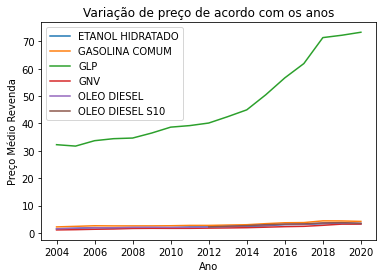

In [ ]:
import matplotlib.pyplot as plt

x1=dataset_precos_analise.query("PRODUTO == 'ETANOL HIDRATADO'")['ANO INICIAL']
x2=dataset_precos_analise.query("PRODUTO == 'GASOLINA COMUM'")['ANO INICIAL']
x3=dataset_precos_analise.query("PRODUTO == 'GLP'")['ANO INICIAL']
x4=dataset_precos_analise.query("PRODUTO == 'GNV'")['ANO INICIAL']
x5=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL'")['ANO INICIAL']
x6=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL S10'")['ANO INICIAL']

y1=dataset_precos_analise.query("PRODUTO == 'ETANOL HIDRATADO'")['PREÇO MÉDIO REVENDA']
y2=dataset_precos_analise.query("PRODUTO == 'GASOLINA COMUM'")['PREÇO MÉDIO REVENDA']
y3=dataset_precos_analise.query("PRODUTO == 'GLP'")['PREÇO MÉDIO REVENDA']
y4=dataset_precos_analise.query("PRODUTO == 'GNV'")['PREÇO MÉDIO REVENDA']
y5=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL'")['PREÇO MÉDIO REVENDA']
y6=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL S10'")['PREÇO MÉDIO REVENDA']

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)
plt.legend(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GLP', 'GNV', 'OLEO DIESEL', 'OLEO DIESEL S10']);
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')

plt.title('Variação de preço de acordo com os anos')
plt.show()

Pelo gráfico é possível analisar que os valores de GLP (por possuirem unidades de grandeza diferentes dos demais), optamos por subdividir suas curvas.

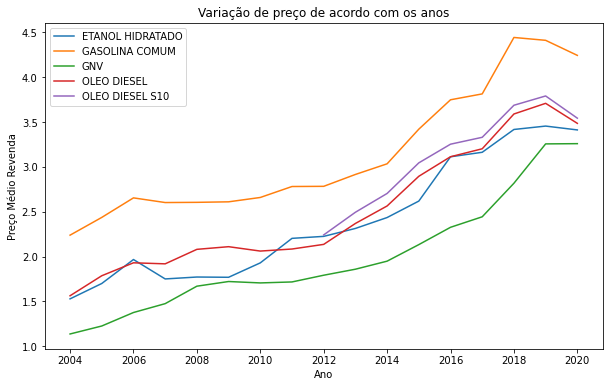

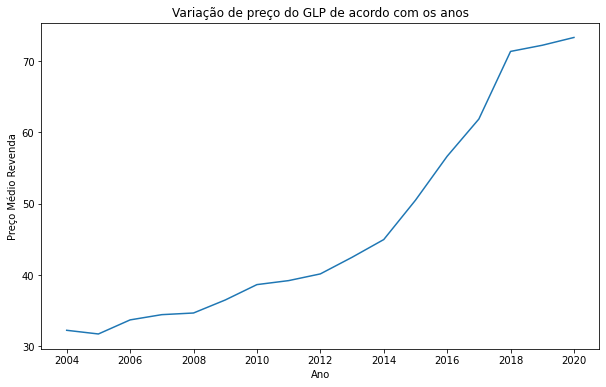

In [ ]:
import matplotlib.pyplot as plt

x1=dataset_precos_analise.query("PRODUTO == 'ETANOL HIDRATADO'")['ANO INICIAL']
x2=dataset_precos_analise.query("PRODUTO == 'GASOLINA COMUM'")['ANO INICIAL']
x4=dataset_precos_analise.query("PRODUTO == 'GNV'")['ANO INICIAL']
x5=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL'")['ANO INICIAL']
x6=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL S10'")['ANO INICIAL']

y1=dataset_precos_analise.query("PRODUTO == 'ETANOL HIDRATADO'")['PREÇO MÉDIO REVENDA']
y2=dataset_precos_analise.query("PRODUTO == 'GASOLINA COMUM'")['PREÇO MÉDIO REVENDA']
y4=dataset_precos_analise.query("PRODUTO == 'GNV'")['PREÇO MÉDIO REVENDA']
y5=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL'")['PREÇO MÉDIO REVENDA']
y6=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL S10'")['PREÇO MÉDIO REVENDA']

plt.figure(figsize=(10, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x4,y4)
plt.plot(x5,y5)
plt.plot(x6,y6)

plt.legend(['ETANOL HIDRATADO', 'GASOLINA COMUM', 'GNV', 'OLEO DIESEL', 'OLEO DIESEL S10']);
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')
plt.title('Variação de preço de acordo com os anos')

plt.show()

x3=dataset_precos_analise.query("PRODUTO == 'GLP'")['ANO INICIAL']
y3=dataset_precos_analise.query("PRODUTO == 'GLP'")['PREÇO MÉDIO REVENDA']

plt.figure(figsize=(10, 6))
plt.plot(x3,y3)
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')
plt.title('Variação de preço do GLP de acordo com os anos')
plt.show()


Conclui-se que temos um aumento na média brasileira de "praticamente" proporcional entre os diferentes produtos. O que pode sugerir um aumento ocasionado por:
 - inflação
 - crescimento econômico
 - Olhando para o gráfico de GLP, em 2012 houve um aumento descontrolado no preço do gás de cozinha, devido a paridade política, mantendo o preço "dolarizado". Por ser por isso que neste período houve um aumento acentuado.

A partir deste momento vamos analisar em foco 2 produtos:
 - Gasolina: por ser um dos combustíveis mais usados pela população em geral
 - Oleo Diesel S10: Por ser um dos principais combustíveis de carretas transportadoras de insumos.

In [ ]:
dataset_precos_analise = dataset_gas_limpo.query("PRODUTO == 'GASOLINA COMUM' | PRODUTO == 'OLEO DIESEL S10'")[['ANO INICIAL', 'PRODUTO', 'PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','PRODUTO'],as_index=False).mean()
dataset_precos_analise.tail()

,ANO INICIAL,PRODUTO,PREÇO MÉDIO REVENDA
21,2018,OLEO DIESEL S10,3.687866
22,2019,GASOLINA COMUM,4.412135
23,2019,OLEO DIESEL S10,3.791501
24,2020,GASOLINA COMUM,4.244198
25,2020,OLEO DIESEL S10,3.543781


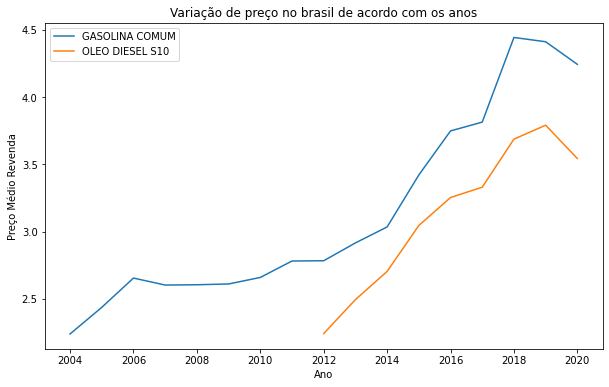

In [ ]:
x1=dataset_precos_analise.query("PRODUTO == 'GASOLINA COMUM'")['ANO INICIAL']
x2=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL S10'")['ANO INICIAL']

y1=dataset_precos_analise.query("PRODUTO == 'GASOLINA COMUM'")['PREÇO MÉDIO REVENDA']
y2=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL S10'")['PREÇO MÉDIO REVENDA']

plt.figure(figsize=(10, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)

plt.legend(['GASOLINA COMUM', 'OLEO DIESEL S10']);
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')
plt.title('Variação de preço no brasil de acordo com os anos')

plt.show()

Conclusões relacionadas ao aumento do preço dos combustíveis do gráfico anterior:
 - Os preços do óleo diesel só começaram a ser medidos a partir de 2012;
 - Ocorrência da greve dos caminhoneiros em 2018 provocando um aumento, e este evento acabou tendo consequências até seu pico em 2019.
 - Chegada da pandemia em 2020, provocando redução de uso de transportes em geral.

### 4.2.Como é a evolução de preços desses produtos em escala regional?

Vamos olhar as variações ocorridas no Sudeste:

In [ ]:
dataset_precos_analise = dataset_gas_limpo.query("(PRODUTO == 'GASOLINA COMUM' | PRODUTO == 'OLEO DIESEL S10') & REGIÃO == 'CENTRO OESTE'")[['ANO INICIAL', 'PRODUTO', 'PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','PRODUTO'],as_index=False).mean()
dataset_precos_analise.tail()

,ANO INICIAL,PRODUTO,PREÇO MÉDIO REVENDA
20,2018,OLEO DIESEL S10,3.789850
21,2019,GASOLINA COMUM,4.363827
22,2019,OLEO DIESEL S10,3.844274
23,2020,GASOLINA COMUM,4.221015
24,2020,OLEO DIESEL S10,3.586879


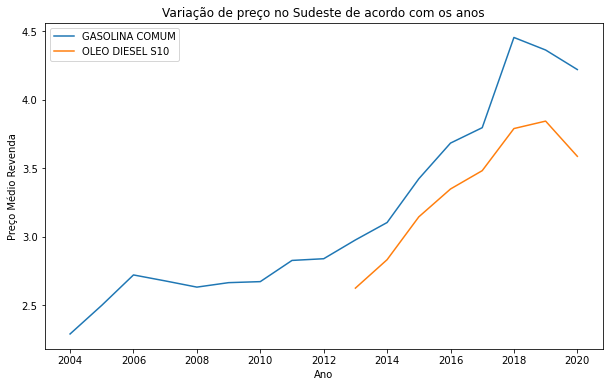

In [ ]:
x1=dataset_precos_analise.query("PRODUTO == 'GASOLINA COMUM'")['ANO INICIAL']
x2=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL S10'")['ANO INICIAL']

y1=dataset_precos_analise.query("PRODUTO == 'GASOLINA COMUM'")['PREÇO MÉDIO REVENDA']
y2=dataset_precos_analise.query("PRODUTO == 'OLEO DIESEL S10'")['PREÇO MÉDIO REVENDA']

plt.figure(figsize=(10, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)

plt.legend(['GASOLINA COMUM', 'OLEO DIESEL S10']);
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')
plt.title('Variação de preço no Sudeste de acordo com os anos')

plt.show()

Conclusões relacionadas ao aumento do preço dos combustíveis do gráfico anterior:
 - Vendo a curva (por seguir média nacional);
 - Ocorrência da greve dos caminhoneiros em 2018 provocando um aumento, e este evento acabou tendo consequências até seu pico em 2019.
 - Chegada da pandemia em 2020, provocando redução de uso de transportes em geral.

In [ ]:
dataset_precos_analise_gasolina = dataset_gas_limpo.query("PRODUTO == 'GASOLINA COMUM'")[['ANO INICIAL', 'REGIÃO', 'PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','REGIÃO'],as_index=False).mean()
dataset_precos_analise_diesel = dataset_gas_limpo.query("PRODUTO == 'OLEO DIESEL S10'")[['ANO INICIAL', 'REGIÃO', 'PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','REGIÃO'],as_index=False).mean()
dataset_precos_analise_gasolina.tail()

,ANO INICIAL,REGIÃO,PREÇO MÉDIO REVENDA
80,2020,CENTRO OESTE,4.221015
81,2020,NORDESTE,4.265799
82,2020,NORTE,4.231162
83,2020,SUDESTE,4.337841
84,2020,SUL,4.117343


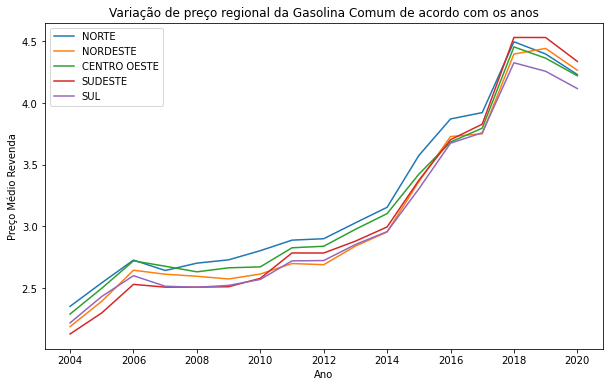

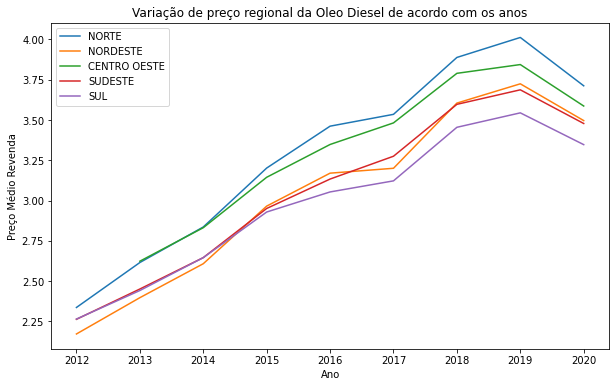

In [ ]:
x1=dataset_precos_analise_gasolina.query("REGIÃO == 'NORTE'")['ANO INICIAL']
x2=dataset_precos_analise_gasolina.query("REGIÃO == 'NORDESTE'")['ANO INICIAL']
x3=dataset_precos_analise_gasolina.query("REGIÃO == 'CENTRO OESTE'")['ANO INICIAL']
x4=dataset_precos_analise_gasolina.query("REGIÃO == 'SUDESTE'")['ANO INICIAL']
x5=dataset_precos_analise_gasolina.query("REGIÃO == 'SUL'")['ANO INICIAL']

y1=dataset_precos_analise_gasolina.query("REGIÃO == 'NORTE'")['PREÇO MÉDIO REVENDA']
y2=dataset_precos_analise_gasolina.query("REGIÃO == 'NORDESTE'")['PREÇO MÉDIO REVENDA']
y3=dataset_precos_analise_gasolina.query("REGIÃO == 'CENTRO OESTE'")['PREÇO MÉDIO REVENDA']
y4=dataset_precos_analise_gasolina.query("REGIÃO == 'SUDESTE'")['PREÇO MÉDIO REVENDA']
y5=dataset_precos_analise_gasolina.query("REGIÃO == 'SUL'")['PREÇO MÉDIO REVENDA']

plt.figure(figsize=(10, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)

plt.legend(['NORTE', 'NORDESTE', 'CENTRO OESTE', 'SUDESTE', 'SUL']);
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')
plt.title('Variação de preço regional da Gasolina Comum de acordo com os anos')

plt.show()

x1=dataset_precos_analise_diesel.query("REGIÃO == 'NORTE'")['ANO INICIAL']
x2=dataset_precos_analise_diesel.query("REGIÃO == 'NORDESTE'")['ANO INICIAL']
x3=dataset_precos_analise_diesel.query("REGIÃO == 'CENTRO OESTE'")['ANO INICIAL']
x4=dataset_precos_analise_diesel.query("REGIÃO == 'SUDESTE'")['ANO INICIAL']
x5=dataset_precos_analise_diesel.query("REGIÃO == 'SUL'")['ANO INICIAL']

y1=dataset_precos_analise_diesel.query("REGIÃO == 'NORTE'")['PREÇO MÉDIO REVENDA']
y2=dataset_precos_analise_diesel.query("REGIÃO == 'NORDESTE'")['PREÇO MÉDIO REVENDA']
y3=dataset_precos_analise_diesel.query("REGIÃO == 'CENTRO OESTE'")['PREÇO MÉDIO REVENDA']
y4=dataset_precos_analise_diesel.query("REGIÃO == 'SUDESTE'")['PREÇO MÉDIO REVENDA']
y5=dataset_precos_analise_diesel.query("REGIÃO == 'SUL'")['PREÇO MÉDIO REVENDA']

plt.figure(figsize=(10, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)

plt.legend(['NORTE', 'NORDESTE', 'CENTRO OESTE', 'SUDESTE', 'SUL']);
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')
plt.title('Variação de preço regional da Oleo Diesel de acordo com os anos')

plt.show()

Conclusões relacionadas ao aumento do preço dos combustíveis dos gráficos anteriores:
 - Custo do diesel na região Norte faz sentido ser mais caro, devido ao polo de mineradoras (alta demanda), onde há um maquinário pesado, além da região norte possuir muito pontos de dificil acesso;
 - A respeito do custo da Gasolina Comum, de 2008 até 2017, a região Norte liderou o preço mais caro até que nos últimos anos, o sudeste passou a liderar.
 - Um dos motivos, de SE ter alta, pode ser em relação a popularização dos aplicativos de delivery (tanto o principal quanto seus concorrentes), provocando uma alta na demanda.

### 4.3.Como é a evolução de preços desses produtos em escala estadual (SE)?

In [ ]:
dataset_precos_analise_gasolina = dataset_gas_limpo.query("PRODUTO == 'GASOLINA COMUM' & REGIÃO == 'SUDESTE'")[['ANO INICIAL', 'PRODUTO', 'ESTADO', 'PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','ESTADO'],as_index=False).mean()
dataset_precos_analise_diesel = dataset_gas_limpo.query("PRODUTO == 'OLEO DIESEL S10' & REGIÃO == 'SUDESTE'")[['ANO INICIAL', 'PRODUTO', 'ESTADO', 'PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','ESTADO'],as_index=False).mean()

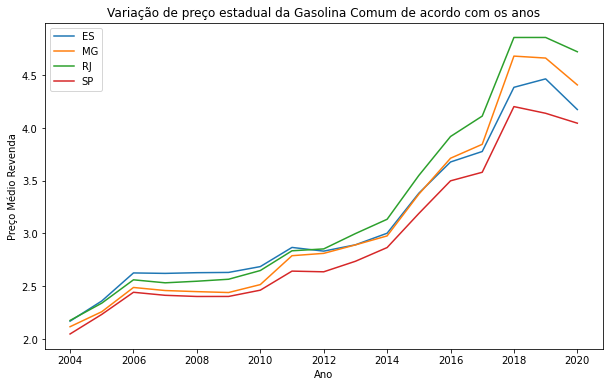

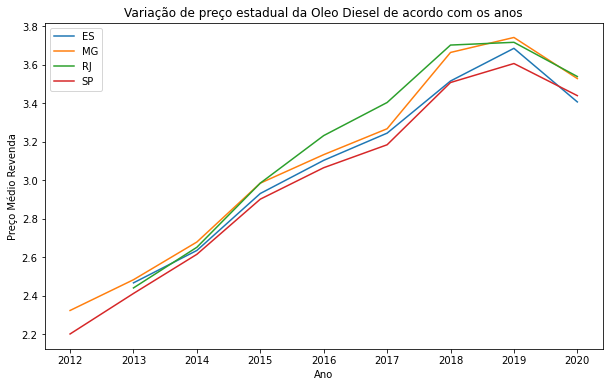

In [ ]:
x1=dataset_precos_analise_gasolina.query("ESTADO == 'ES'")['ANO INICIAL']
x2=dataset_precos_analise_gasolina.query("ESTADO == 'MG'")['ANO INICIAL']
x3=dataset_precos_analise_gasolina.query("ESTADO == 'RJ'")['ANO INICIAL']
x4=dataset_precos_analise_gasolina.query("ESTADO == 'SP'")['ANO INICIAL']

y1=dataset_precos_analise_gasolina.query("ESTADO == 'ES'")['PREÇO MÉDIO REVENDA']
y2=dataset_precos_analise_gasolina.query("ESTADO == 'MG'")['PREÇO MÉDIO REVENDA']
y3=dataset_precos_analise_gasolina.query("ESTADO == 'RJ'")['PREÇO MÉDIO REVENDA']
y4=dataset_precos_analise_gasolina.query("ESTADO == 'SP'")['PREÇO MÉDIO REVENDA']

plt.figure(figsize=(10, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)

plt.legend(['ES', 'MG', 'RJ', 'SP']);
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')
plt.title('Variação de preço estadual da Gasolina Comum de acordo com os anos')

plt.show()

x1=dataset_precos_analise_diesel.query("ESTADO == 'ES'")['ANO INICIAL']
x2=dataset_precos_analise_diesel.query("ESTADO == 'MG'")['ANO INICIAL']
x3=dataset_precos_analise_diesel.query("ESTADO == 'RJ'")['ANO INICIAL']
x4=dataset_precos_analise_diesel.query("ESTADO == 'SP'")['ANO INICIAL']

y1=dataset_precos_analise_diesel.query("ESTADO == 'ES'")['PREÇO MÉDIO REVENDA']
y2=dataset_precos_analise_diesel.query("ESTADO == 'MG'")['PREÇO MÉDIO REVENDA']
y3=dataset_precos_analise_diesel.query("ESTADO == 'RJ'")['PREÇO MÉDIO REVENDA']
y4=dataset_precos_analise_diesel.query("ESTADO == 'SP'")['PREÇO MÉDIO REVENDA']

plt.figure(figsize=(10, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)

plt.legend(['ES', 'MG', 'RJ', 'SP']);
plt.xlabel('Ano')
plt.ylabel('Preço Médio Revenda')
plt.title('Variação de preço estadual da Oleo Diesel de acordo com os anos')

plt.show()

Conclusões relacionadas ao aumento do preço dos combustíveis dos gráficos anteriores:
 - Valor do combustível no RJ é o maior perante os demais. Engraçado que RJ possui mais refinarias, no entanto acredito que boa parte do petróleo que chega do exterior deva vir do porto de Santos, pode ser por isso.
 - O que corrobora com o preço de SP ser o mais baixo;
 - O valor de Diesel de RJ se compara com MG. MG possui muitas siderurgicas e mineradoras, o que corrobora com o aumento de seu custo (dada a demanda). Com relação ao RJ pode ser em relação tambem com siderurgicas, mas mais do que isso, seja em relação a Empresas Transportadoras.
 - Falar a respeito da dolarização do combustível a partir do governo Temer (2015/2016).


### 4.4.A partir dessas análises, o que muda? Qual região/estado tem maior variação de preços médios? Preço médio min e max?

Para este estudo vamos analisar apenas para Gasolina comum.

Primeiramente, vamos coletar os preços máximos e mnímios de revenda para cada região e centralizar em um único dataframe: 

In [ ]:
dataset_gasolina_max = dataset_gas_limpo.query("PRODUTO == 'GASOLINA COMUM'")[['ANO INICIAL', 'REGIÃO', 'PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','REGIÃO'],as_index=False).max()
dataset_gasolina_min = dataset_gas_limpo.query("PRODUTO == 'GASOLINA COMUM'")[['ANO INICIAL', 'REGIÃO', 'PREÇO MÉDIO REVENDA']].groupby(['ANO INICIAL','REGIÃO'],as_index=False).min()
dataset_gasolina = dataset_gasolina_max
dataset_gasolina = dataset_gasolina.rename(columns={'PREÇO MÉDIO REVENDA': 'PREÇO MÁXIMO DE REVENDA'})
dataset_gasolina.head()

,ANO INICIAL,REGIÃO,PREÇO MÁXIMO DE REVENDA
0,2004,CENTRO OESTE,2.707
1,2004,NORDESTE,2.457
2,2004,NORTE,2.639
3,2004,SUDESTE,2.316
4,2004,SUL,2.486


In [ ]:
dataset_gasolina['PREÇO MÍNIMO DE REVENDA'] = dataset_gasolina_min['PREÇO MÉDIO REVENDA']
dataset_gasolina.head()

,ANO INICIAL,REGIÃO,PREÇO MÁXIMO DE REVENDA,PREÇO MÍNIMO DE REVENDA
0,2004,CENTRO OESTE,2.707,1.936
1,2004,NORDESTE,2.457,1.949
2,2004,NORTE,2.639,1.995
3,2004,SUDESTE,2.316,1.888
4,2004,SUL,2.486,1.961


Agora vamos adicionar uma coluna com a diferença de preços.

In [ ]:
dataset_gasolina['DIFERENÇA PREÇOS'] = dataset_gasolina['PREÇO MÁXIMO DE REVENDA'] - dataset_gasolina['PREÇO MÍNIMO DE REVENDA']
dataset_gasolina.head()

,ANO INICIAL,REGIÃO,PREÇO MÁXIMO DE REVENDA,PREÇO MÍNIMO DE REVENDA,DIFERENÇA PREÇOS
0,2004,CENTRO OESTE,2.707,1.936,0.771
1,2004,NORDESTE,2.457,1.949,0.508
2,2004,NORTE,2.639,1.995,0.644
3,2004,SUDESTE,2.316,1.888,0.428
4,2004,SUL,2.486,1.961,0.525


Plotar a diferença de preço entre as médias mínimas e máximas

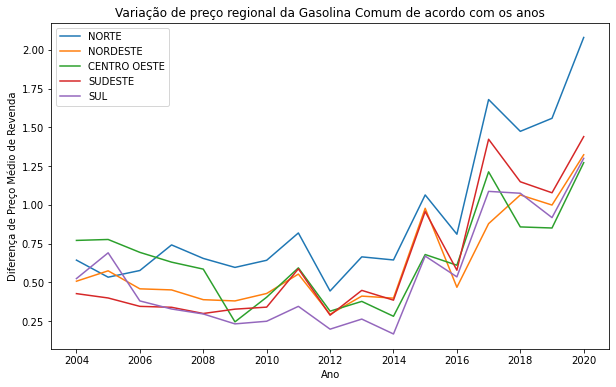

In [ ]:
x1=dataset_gasolina.query("REGIÃO == 'NORTE'")['ANO INICIAL']
x2=dataset_gasolina.query("REGIÃO == 'NORDESTE'")['ANO INICIAL']
x3=dataset_gasolina.query("REGIÃO == 'CENTRO OESTE'")['ANO INICIAL']
x4=dataset_gasolina.query("REGIÃO == 'SUDESTE'")['ANO INICIAL']
x5=dataset_gasolina.query("REGIÃO == 'SUL'")['ANO INICIAL']

y1=dataset_gasolina.query("REGIÃO == 'NORTE'")['DIFERENÇA PREÇOS']
y2=dataset_gasolina.query("REGIÃO == 'NORDESTE'")['DIFERENÇA PREÇOS']
y3=dataset_gasolina.query("REGIÃO == 'CENTRO OESTE'")['DIFERENÇA PREÇOS']
y4=dataset_gasolina.query("REGIÃO == 'SUDESTE'")['DIFERENÇA PREÇOS']
y5=dataset_gasolina.query("REGIÃO == 'SUL'")['DIFERENÇA PREÇOS']

plt.figure(figsize=(10, 6))
plt.plot(x1,y1)
plt.plot(x2,y2)
plt.plot(x3,y3)
plt.plot(x4,y4)
plt.plot(x5,y5)

plt.legend(['NORTE', 'NORDESTE', 'CENTRO OESTE', 'SUDESTE', 'SUL']);
plt.xlabel('Ano')
plt.ylabel('Diferença de Preço Médio de Revenda')
plt.title('Variação de preço regional da Gasolina Comum de acordo com os anos')

plt.show()

Dado o gráfico é possivel ver que:
 - A região Norte teve maior variação de preço de gasolina perante os demais
 - Por conta da inflação a variação tambem teve uma tendencia de alta

## 5.0 CONCLUSÕES

ps.: Vou deixar aqui embaixo um texto exemplo de conclusão que fiz um tempo atrás a respeito de análise de dataset:

O presente trabalho mostrou algumas análises interessantes a respeito do dataset retirado do site do SUS. Foi mostrado que o Brasil vem passando por períodos endêmicos durante sua história o que culminou em variação de sua população e quantidade de óbitos.

O banco de dados retirado, vem analisar as consequências da passagem da Covid-19 durante o período de 2020/2021, a qual ainda não foi firmada como finalizada.

As análises por região nos mostra um padrão a respeito da queda de internações registradas no inicio de 2020 e consequente aumento de óbitos, representando assim a chegada da primeira onda da pandemia. Logo após, a primeira e segunda onda de mortes foram analisadas mais de perto através de recorte no gráfico, o que chegou-se na conclusão que a curva de internações da segunda onda não caiu tal qual a primeira, pois foram construídos hospitais de campanha em todo país.

Em terceiro, foi investigada a sazonalidade dos óbitos no país, durante período não-anômalos. Chegou-se a conclusão que de Dezembro a Fevereiro, o índice de mortes e internações declina em relação a média no restante do ano.

Por fim, foi analisada a relação de internações e óbitos de Pernambuco em relação aos demais estados do Nordeste.

Olhando pelo lado técnico, o presente trabalho utilizou retirada de dados a partir de dois arquivos CSV. Os DataFrame criados foram previamente filtrados de modo que apenas as informações relevantes estivessem presentes, além de que os dados não colhidos (representado por um hífen) foram substituídos pela função NaN (Not-a-number) de modo que a biblioteca Pandas pudesse lê-lo sem problemas.

Para plotagem de gráficos, a biblioteca Matplotlib foi utilizada de modo a alterar as vizualizações deixando-as claras e objetivas para o leitor.

## 6.0 REFERÊNCIAS

 - [Kaggle](https://www.kaggle.com/datasets/matheusfreitag/gas-prices-in-brazil)
 - [Governo](https://www.gov.br/anp/pt-br/assuntos/precos-e-defesa-da-concorrencia/precos/precos-revenda-e-de-distribuicao-combustiveis)

---

SAIBA MAIS

In [ ]:
# OBSERVAÇÃO
# Antes de removermos as linhas NaN, nós tentamos inicialmente substituir seus valores por None. 
# Curiosamente quando realizamos um replace para None, estes valores acabam recebendo o valor da linha superior. 
# Vamos fazer um exemplo pequeno e prático abaixo

# '-999999.0'
# dataset_gas.iloc[120764]

# '-'
# dataset_gas.iloc[1903]

# '-999999.0'
# dataset_gas.iloc[120768, 15]

In [ ]:
data = [['-', 2, 3], [4, '-', 6], [7, 8, '-']]

df = pd.DataFrame(data, columns=["A", "B", "C"])
df

,A,B,C
0,-,2,3
1,4,-,6
2,7,8,-


In [ ]:
df = df.replace('-', None)
df

,A,B,C
0,-,2,3
1,4,2,6
2,7,8,6


---